In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import load_results

# === Load results ===
experiments, outcomes = load_results('dike_experiments_3.tar.gz')

[MainProcess/INFO] results loaded successfully from /Users/amaryllisbrosens/PycharmProjects/MBDM-Group-1/dike_experiments_3.tar.gz


In [22]:
# Display a summary
print("Experiments (designs and uncertainties):")
print(experiments.head())

print("\nOutcomes (keys only):")
print(list(outcomes.keys()))


Experiments (designs and uncertainties):
   A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                       87  276.939773      10.0   0.842508   50.691911   
1                       72   45.079948      10.0   0.285950  141.294627   
2                       69  100.146281       1.5   0.488108  270.149121   
3                       37  314.847229       1.5   0.379740   90.561009   
4                       14   44.256898       1.0   0.302850  203.814852   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0       1.5   0.754171  171.841417      10.0   0.009759  ...   
1      10.0   0.413624  109.636569       1.0   0.086333  ...   
2       1.0   0.745011  232.317674       1.0   0.657051  ...   
3       1.5   0.481516  215.282838       1.0   0.424989  ...   
4       1.0   0.194300  297.329653       1.0   0.653029  ...   

   A.3_DikeIncrease 2 A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                   0                  0                   

In [23]:
print(len(experiments))


10000


In [24]:
# Print all available outcome names
print("Available outcome names:")
for outcome_name in outcomes.keys():
    print(outcome_name)

Available outcome names:
A.1 Total Costs
A.1_Expected Number of Deaths
A.1_Minimum Water Level
A.1_95% Guaranteed Water Level
A.1_98% Guaranteed Water Level
A.2 Total Costs
A.2_Expected Number of Deaths
A.2_Minimum Water Level
A.2_95% Guaranteed Water Level
A.2_98% Guaranteed Water Level
A.3 Total Costs
A.3_Expected Number of Deaths
A.3_Minimum Water Level
A.3_95% Guaranteed Water Level
A.3_98% Guaranteed Water Level
A.4 Total Costs
A.4_Expected Number of Deaths
A.4_Minimum Water Level
A.4_95% Guaranteed Water Level
A.4_98% Guaranteed Water Level
A.5 Total Costs
A.5_Expected Number of Deaths
A.5_Minimum Water Level
A.5_95% Guaranteed Water Level
A.5_98% Guaranteed Water Level
RfR Total Costs
Expected Evacuation Costs


In [92]:
# === Define targets for PRIM ===
# target 5 m as the transport company asked us , 5 is too strict, I'm using 4.5

target = (
    (outcomes['A.1_Minimum Water Level'] < 4.5) |
    (outcomes['A.2_Minimum Water Level'] < 4.5) |
    (outcomes['A.3_Minimum Water Level'] < 4.5) |
    (outcomes['A.4_Minimum Water Level'] < 4.5) |
    (outcomes['A.5_Minimum Water Level'] < 4.5)
)
# I'm using OR for the worst-case, if we want good cases we need to use AND

In [93]:
print(target.sum())        # Total number of True values
print(len(target))         # Total number of cases
print(np.unique(target))   # Should be [True, False]


5003
10000
[False  True]


In [94]:
# === Run PRIM ===
prim_alg = prim.Prim(experiments, target, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()


[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 10000 points remaining, containing 5003 cases of interest
[MainProcess/INFO] mean: 0.8977272727272727, mass: 0.0528, coverage: 0.09474315410753548, density: 0.8977272727272727 restricted_dimensions: 13


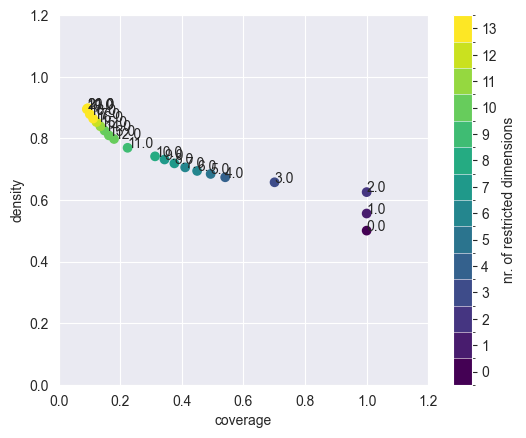

In [95]:
# === Plot and inspect ===
box1.show_tradeoff(annotated =True)
plt.show()

coverage       0.375775
density        0.718654
id             8.000000
k           1880.000000
mass           0.261600
mean           0.718654
n           2616.000000
res_dim        7.000000
Name: 8, dtype: float64

                                                                box 8  \
                                                                  min   
A.1_DikeIncrease 1                                                0.0   
A.1_Bmax                                                    30.144452   
A.1_pfail                                                    0.000792   
policy              {random policy 6, random policy 8, random poli...   
A.4_Brate                                                 {10.0, 1.5}   
discount rate 1                                       {1.5, 2.5, 4.5}   
A.4_pfail                                                    0.093319   

                                                                       \
                                                    

/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{'random policy 6', 'random policy 8', 'random policy 5', 'random policy 9', 'random policy 10', 'random policy 7', 'policy RfR in A1 and A3', 'policy RfR in A1 and A3 and Dike height in A2 and A4', 'random policy 4'}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{'random policy 6', 'random policy 8', 'random policy 5', 'random policy 9', 'random policy 10', 'random policy 7', 'policy

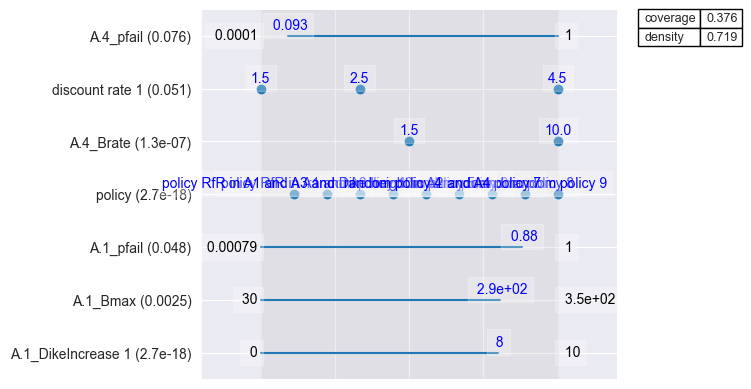

In [96]:
# choose a box that has moderate to high coverage (captures many good cases)
# and higher density

point = 8
# Inspect top box
box1.inspect(point)
box1.inspect(point, style='graph')
plt.show()

In [ ]:
# | Term         | Meaning                                                                    |
# | ------------ | -------------------------------------------------------------------------- |
# | **coverage** | % of all target (interesting) cases included in this box (here: \~51.3%)   |
# | **density**  | % of cases in the box that are target cases (here: 72.5%)                  |
# | **id**       | The box ID (13)                                                            |
# | **k**        | Number of peeling iterations (116)                                         |
# | **mass**     | % of the dataset that lies in this box (16%)                               |
# | **mean**     | Same as density (72.5%)                                                    |
# | **n**        | Total number of cases in this box (160 cases)                              |
# | **res\_dim** | Dimensionality of the box (number of variables used to define it, here: 8) |


# | Variable                  | Min             | Max      | qp value | Notes
# | `A.0_ID flood wave shape` | 0.0             | 116.0    | NaN      | Used to define box, but no q-value (probably not very influential) |
# | `A.1_pfail`               | 0.00106         | 0.80886  | 0.003407 | Influential, based on q-value
# | `discount rate 1`         | {1.5, 2.5, 4.5} | same     | 0.000198 | It's categorical (not numeric), hence warning
# | `A.3_pfail`               | 0.063718        | 0.801519 | 0.000011 | Very small q-value = possibly most influential


In [97]:
#resampling for robustness
#it checks how robust the box is by applying the box's contraints to resampled or shuffled versions of the data
#This helps test how much the box's high performance was due to overfitting
#if the resampled box still shows high coverage/density, the pattern is likely real and stable

box1.resample(point)

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatib

,reproduce coverage,reproduce density
policy,100.0,100.0
A.4_Brate,80.0,80.0
discount rate 1,50.0,50.0
A.1_Bmax,40.0,40.0
A.1_pfail,40.0,40.0
A.1_DikeIncrease 1,40.0,40.0
A.5_Bmax,30.0,30.0
discount rate 0,30.0,30.0
A.3_Bmax,20.0,30.0
A.4_pfail,20.0,20.0


In [ ]:
# | Variable| Reproduce Coverage (%) | Reproduce Density (%) | What It Tells Us
# | **A.2\_Bmax** | 100.0       | 100.0                 | **Very robust** — this constraint is always part of high-performing boxes in resampled data |
# | **A.2\_pfail**     | 70.0    | 80.0                  | Quite stable — appears often in boxes with good coverage and density                        |
# | **discount rate 1**          | 70.0                   | 80.0                  | Also relatively stable, despite being a categorical variable
# | **A.3\_Bmax**                | 60.0                   | 80.0                  | Moderately stable — worth considering, but less consistent
# | **A.0\_ID flood wave shape** | 60.0                   | 60.0                  | Appears regularly but with weaker signal — possibly context-dependent


# From notebook: The resampling shows that for the top 3 parameters we can exactly reproduce coverage and density. This confirms the suggestion of the highly significant quasi p-values in the previous figure. The cellulosic cost is also a relatively reliable indicator with 70% reproduction of coverage and density. The other parameters can be safely ignored when interpreting the results.

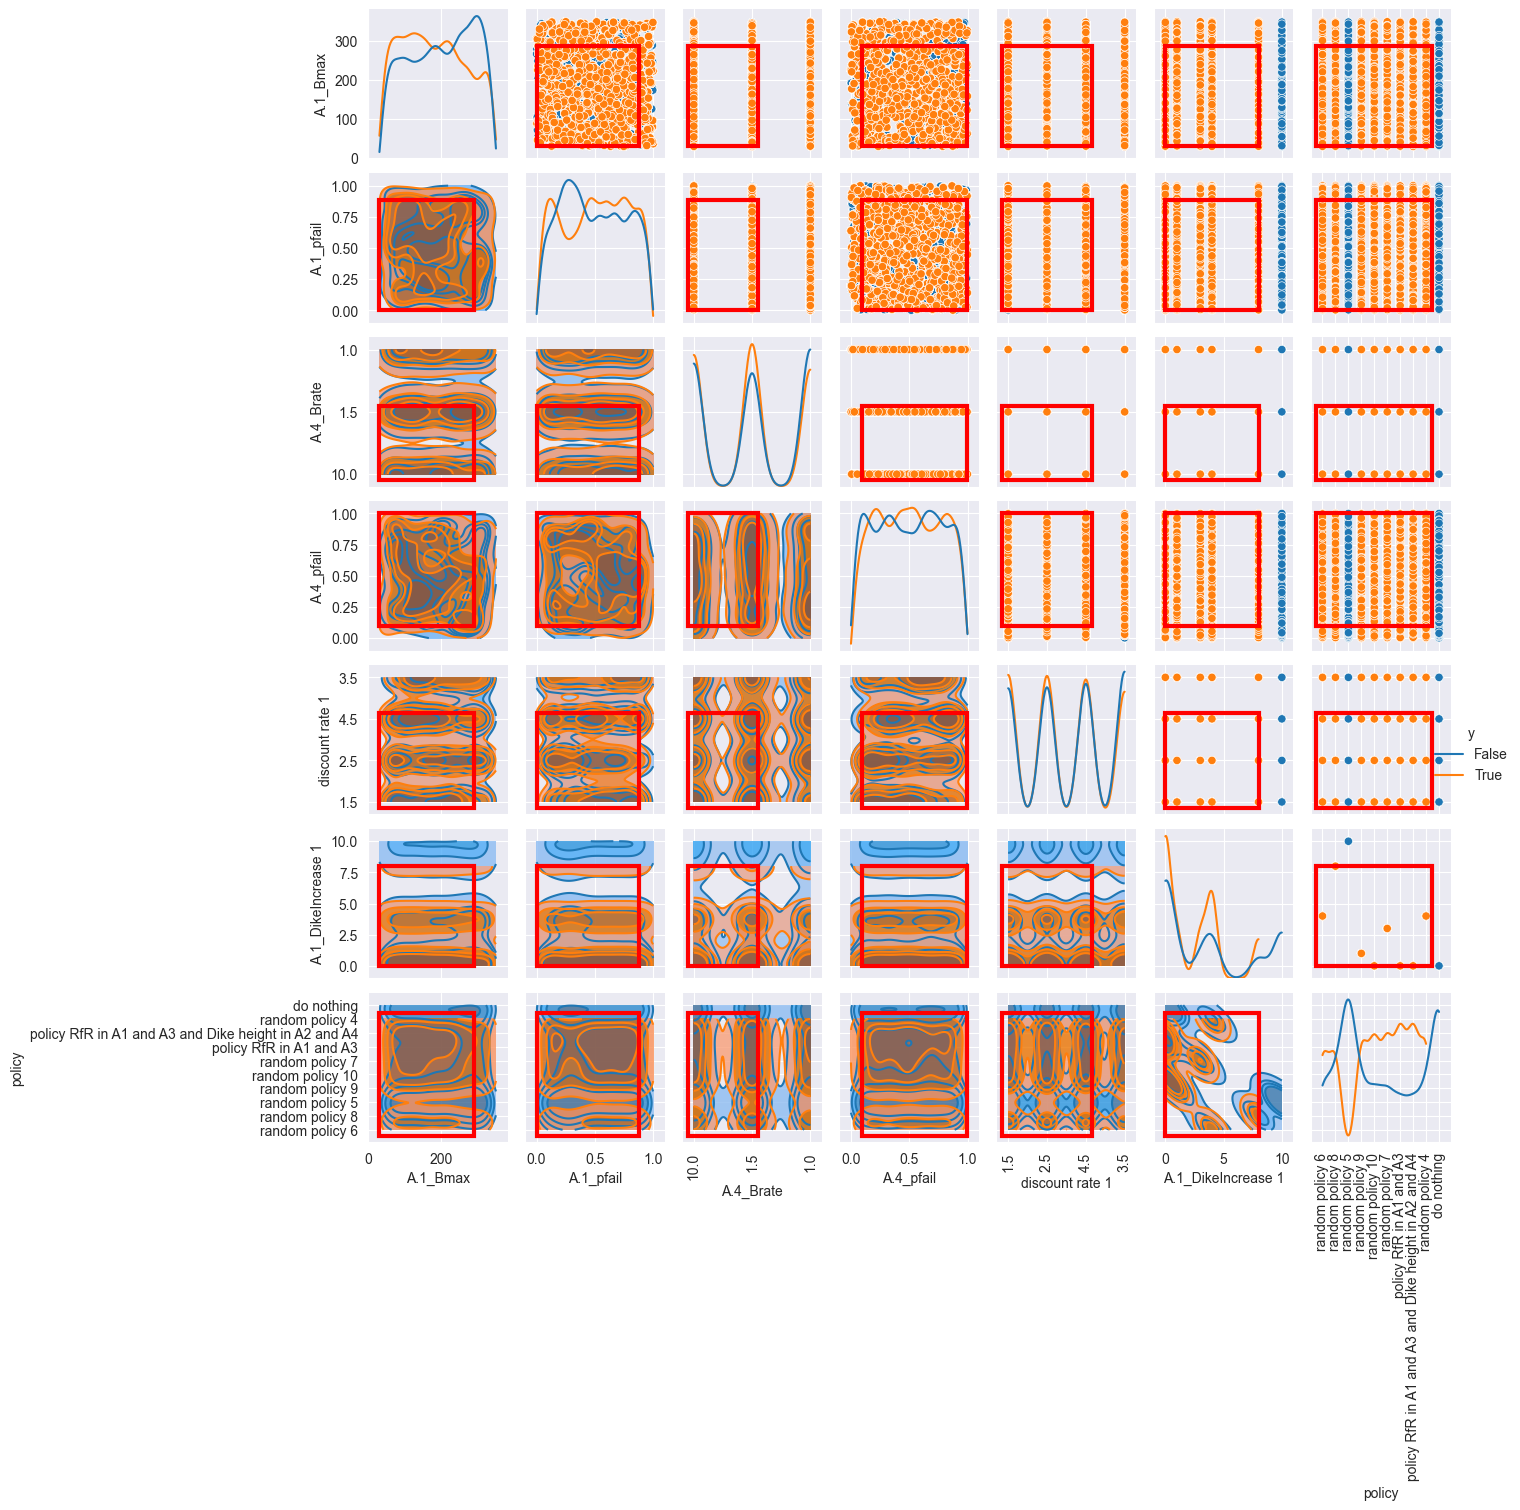

In [98]:
box1.select(8)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
#The above pair-wise scatterplot shows in orange the cases of interest and in blue the cases not of interest. The diagonal shows the Guassian kernel density estimate for both. The red square indicates the identified box limits for each pair of parameters. This plot offers a useful diagnostic of the identified box limits.

In [99]:
#Visualize results using dimensional stacking

from ema_workbench.analysis import dimensional_stacking

In [100]:
# Identify decision levers based on known patterns in their names
levers = [col for col in experiments.columns
          if "RfR" in col or "EWS_DaysToThreat" in col or "DikeIncrease" in col]

# Drop the identified levers from the experiments
cleaned_experiments = experiments.drop(columns=levers)

# (Optional) See which columns were dropped
print("Levers dropped:", levers)

Levers dropped: ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2']


[MainProcess/INFO] model dropped from analysis because only a single category
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


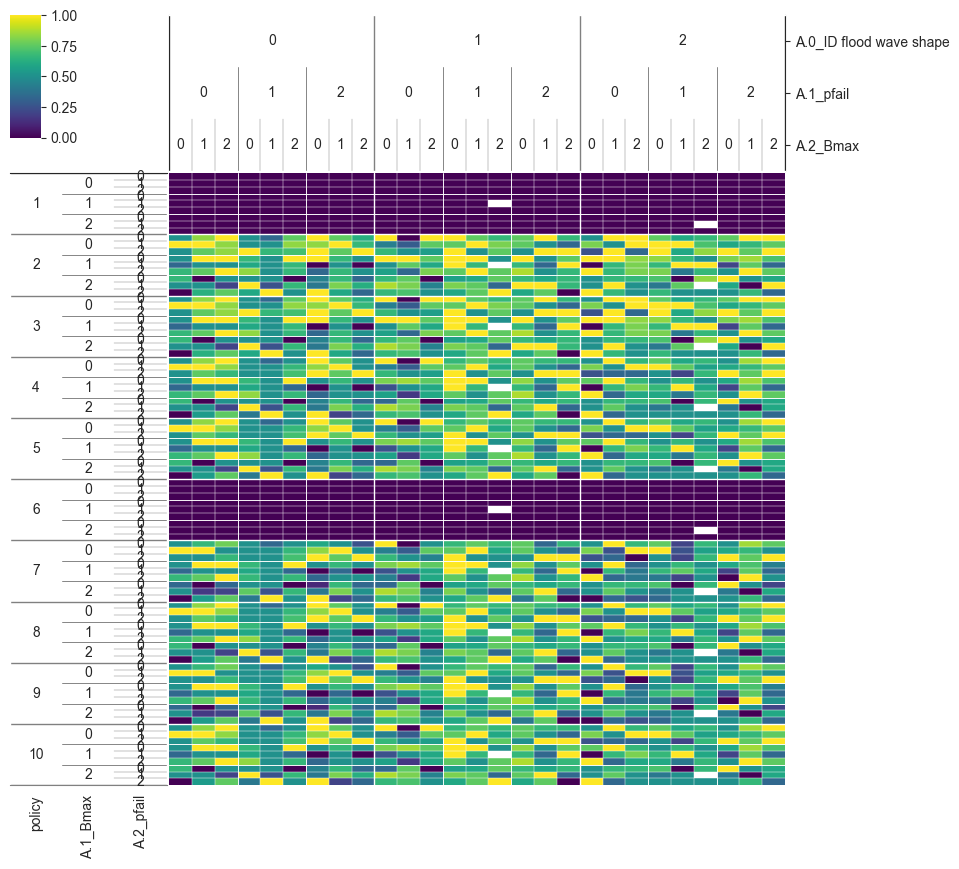

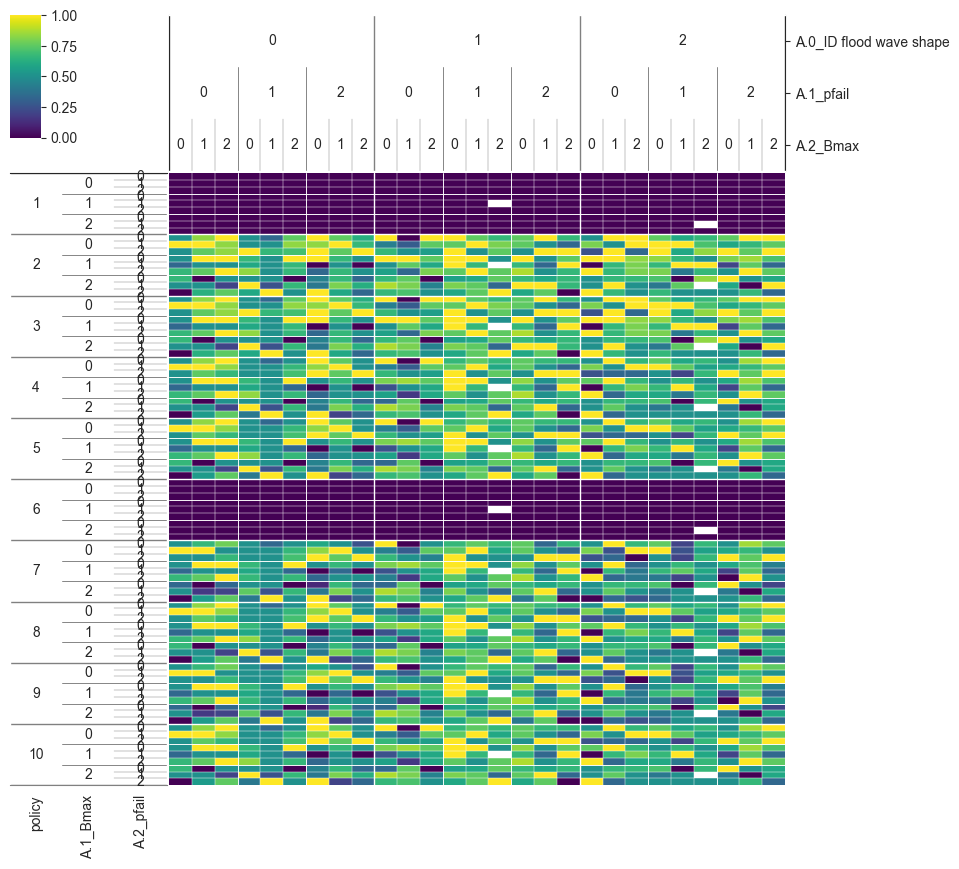

In [101]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, target)